In [4]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift, fft, ifft
import soundfile as sf
from scipy.signal import hann
from CircularBuffer import CircularBuffer, StereoDelay


#KYW inst
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


## Low-Pass Filter-Comb Reverberator
Comb Filter Reverb with low pass filter in feedback loop to replicate how high frequencies act in a real room 

In [7]:
# Setting up IIR Lowpass filter
fc = 10000
b, a = signal.iirfilter(3, fc, btype='lowpass', ftype='butter', output='ba', fs=fs)

w, H = signal.freqz(b, a)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_88001/1323200704.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_88001/1323200704.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


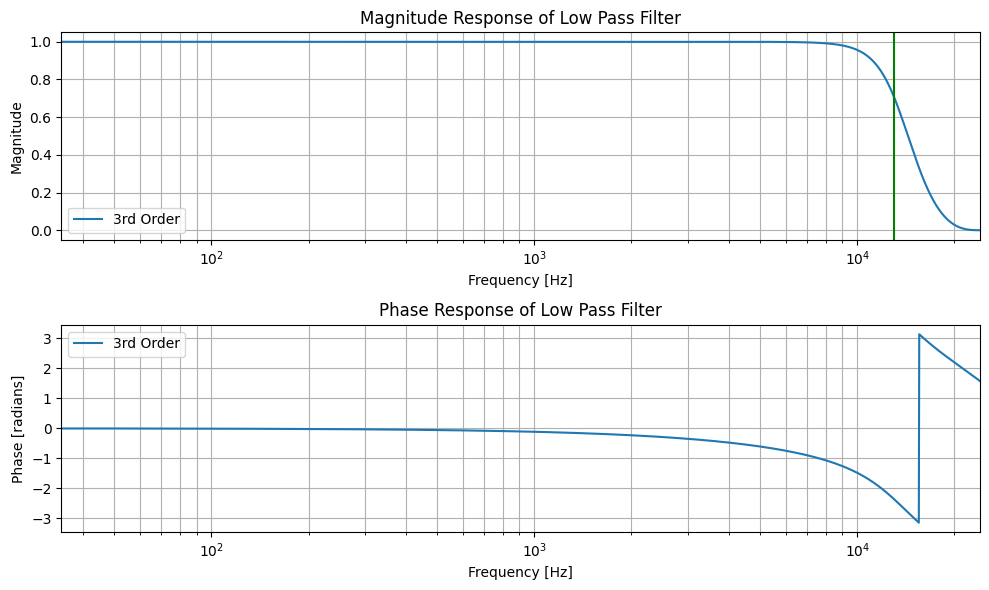

In [9]:
freq_hz = w * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz, np.abs(H), label='3rd Order')
plt.title('Magnitude Response of Low Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.axvline(fc, color='green')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(freq_hz, np.angle(H), label='3rd Order')
plt.title('Phase Response of Low Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
delay_amt = 0.7 #in seconds
delay_amt_samples = delay_amt * fs

delayLine = StereoDelay(delay_amt_samples, delay_amt_samples)

g = 0.6

output = np.zeros((len(data), 2))

for i in range(len(data)):
    delayed = delayLine.get_samples_from_buffer()

    output[i] = delayed

    delayed = np.multiply(delayed, g)

    delayLine.push_samples_to_buffer(delayed + data[i])
